# Реализация алгоритма Дейкстры на произвольном графе

## Графы

 __Граф__ — это абстрактное представление множества объектов и связей между ними.
 
 Графом называют пару $(V, E)$ где $V$ это множество вершин, а $E$ множество пар, каждая из которых представляет собой связь (эти пары называют рёбрами).
 

Граф может быть ориентированным или неориентированным. В ориентированном графе, связи являются направленными (то есть пары в $E$ являются упорядоченными, например пары $(a, b)$ и $(b, a)$ это две разные связи). В свою очередь в неориентированном графе, связи ненаправленные, и поэтому если существует связь $(a, b)$ то значит что существует связь $(b, a)$. 

### Способы представления графов 

2. __Матрицы смежности__ (удобный способ представления __плотных (неразреженных)__ графов); ![matrix](http://kvodo.ru/wp-content/uploads/matrix_smeghnost.jpg)

1. __Списки смежности__ и в виде матрицы смежности (удобный способ представления __разреженных__ графов). 

|<img src="https://koenig-media.raywenderlich.com/uploads/2017/01/graph4.png" width="400"> | <img src="https://koenig-media.raywenderlich.com/uploads/2017/01/graph5.png" width="400">  |
|:---:|:---:|
| Неориентированный граф | Список смежности неориентированного графа|

_Оба способа подходят для представления ориентированных и неориентированных графов._

#### Реализация графа, задаваемого списком смежности 

In [33]:
from collections import defaultdict

class Graph:
    """
    Graph class represents a graph using adjacency list representation
    """
    def __init__(self, directed=False):
        self.graph = defaultdict(list)
        self.verticies = 0
        self.directed = directed
        
    def length(self):
        return self.verticies
    
    def getEdges(self, u):
        return self.graph[u]
 
    def addEdge(self, u, v):
        self.verticies = max(self.verticies, u + 1, v + 1)
        self.graph[u].append(v)
        if not self.directed:
            self.graph[v].append(u)

Построим какой-нибудь очень простой граф, например граф с первого рисунка.

In [34]:
simple_graph = Graph(directed=True)
simple_graph.addEdge(1, 2)
simple_graph.addEdge(1, 4)
simple_graph.addEdge(4, 1)
simple_graph.addEdge(2, 4)
simple_graph.addEdge(4, 3)
simple_graph.addEdge(2, 3)
simple_graph.addEdge(3, 2)

In [35]:
simple_graph.graph[1]

[2, 4]

#### Рисовалка 

Ниже функция рисования графа. Не обязательно, но симпатично. 

In [4]:
from visualizer import draw_graph
%matplotlib inline

Нарисуем построенный нами ранее граф

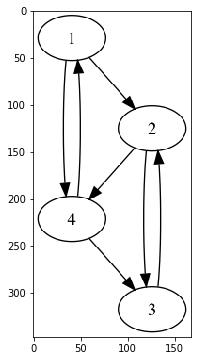

In [5]:
draw_graph(simple_graph, file_name='simple_graph')

#  Алгоритм Дейкстры

Алгоритм Дейстры используется для нахождения кратчайшего пути между вершинами в графе (между двумя заданными вершинами или пути от одной вершины до всех остальных). Данный алгоритм пошагово перебирает все вершины графа и назначает им метки, которые являются известным минимальным расстоянием от вершины источника до конкретной вершины.

_Алгоритм Дейкстры предназначен для работы на графах с ребрами неотрицательного веса._

### Инициализация

Метка начальной вершины полагается равной 0, метки остальных вершин – недостижимо большое число (в идеале — бесконечность). Это отражает то, что расстояния от начальной вершины до других вершин пока неизвестны. Все вершины графа помечаются как непосещенные.

## Описание алгоритма

Если все вершины посещены, алгоритм завершается. 

В противном случае, начинается шаг алгоритма с того, что из ещё не посещённых вершин выбирается вершина $u$, имеющая минимальную метку ($g$-значение). Вершины, смежные с вершиной $u$, назовём соседями этой вершины. Для каждого соседа вершины $u$ рассмотрим новую длину пути, равную сумме текущего $g$-значения $u$ и длины ребра, соединяющего $u$ с этим соседом. Если полученное значение длины меньше $g$-значения соседа, заменим $g$-значение полученным значением длины. Рассмотрев всех соседей, переходим на следующий шаг алгоритма.

[http://e-maxx.ru/algo/dijkstra](http://e-maxx.ru/algo/dijkstra)

###  Реализация

Для начала реализуем самый простой вариант алгоритма, будем считать что переход по всем ребрам стоит одинаково == 1 и нам не нужно сохранять пути до каждой из вершин.
Результатом применения алгоритма является набор меток ($g$-значений) вершин графа.


_Примечание: В данном случае вам предлагается хранения очереди -- sorted queue -- вершины, которые следует посетить._

#### Задание 1 (2 балла)

In [77]:
import math

def Dijkstra(G, start):
    # initialization
    sorted_queue = 
    g_values = 
    while len(sorted_queue) > 0:
        current = # get element from queue (that should have minimal g_value)
        # for each neighbor check if g_value is less
        # And if so change g_value and add neighbor to queue (remember that you should know where minimum is)
        
    return g_values 

Проверим вашу реализацию

In [78]:
G = Graph(True)
G.addEdge(1, 2)
G.addEdge(1, 3)
G.addEdge(1, 6)
G.addEdge(6, 5)
G.addEdge(6, 3)
G.addEdge(3, 2)
G.addEdge(2, 4)
G.addEdge(4, 5)

In [80]:
pathlengths = Dijkstra(G, 1)
assert (pathlengths[1] == 0),"Don't forget the initialization"
assert (pathlengths[2] == pathlengths[3]),"Found path is not the shortest"
assert (pathlengths[5] == 2), "Found path is not the shortest"
pathlengths = Dijkstra(simple_graph, 1)
assert (pathlengths[2] == 1 and pathlengths[4] == 1 and pathlengths[3] == 2),"Found path is not the shortest"
print("Looks OK!")

Looks OK!


При желании можно нарисовать граф.

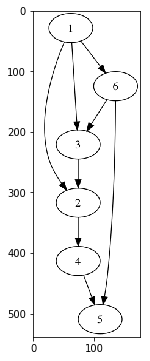

In [79]:
draw_graph(G, file_name='G')

Рассмотрим еще один пример. В качестве графа в этот раз возьмем бинарное дерево.

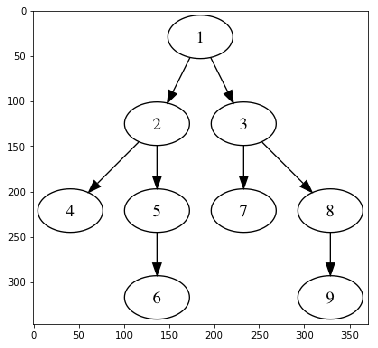

In [81]:
tree = Graph(True)
tree.addEdge(1, 2)
tree.addEdge(1, 3)
tree.addEdge(3, 7)
tree.addEdge(3, 8)
tree.addEdge(2, 4)
tree.addEdge(2, 5)
tree.addEdge(5, 6)
tree.addEdge(8, 9)

draw_graph(tree, file_name='tree')

In [82]:
pathlengths = Dijkstra(tree, 1)
for i in range(1, len(pathlengths)):
    print('Shortest path from vertex 1 to', i, 'equals', pathlengths[i])

Shortest path from vertex 1 to 1 equals 0
Shortest path from vertex 1 to 2 equals 1
Shortest path from vertex 1 to 3 equals 1
Shortest path from vertex 1 to 4 equals 2
Shortest path from vertex 1 to 5 equals 2
Shortest path from vertex 1 to 6 equals 3
Shortest path from vertex 1 to 7 equals 2
Shortest path from vertex 1 to 8 equals 2
Shortest path from vertex 1 to 9 equals 3


## Поиск пути между двумя заданными вершинами

Теперь когда мы знаем расстояния до всех вершин в графе можно решать задачу поиска кратчайшего пути между двумя заданными вершинами.

Для начала разберем алгоритм __обратного восстановления__ пути по имеющимся $g$-значениям.

### Описание алгоритма

Итак, алгоритм Дейкстры, запущенный из начальной вершины, отработал, мы получили $g$-значения для каждой вершины нашего графа. Предположим теперь, что нам необходимо найти кратчайший путь из начальной вершины в известную нам вершину $v$.  Алгоритм обратного восстановления похож на развернутый алгоритм Дейкстры.
Для всех вершин $u$, смежных с вершиной $v$ проверим, совпадает ли $g$-значение вершины $u$ + 1 c $g$-значением вершины $v$, если совпадает, значит мы пришли в вершину $v$ из $u$, запоминаем переход и переходим на следующий шаг алгоритма.

_На этапе поиска вершины-родителя может случится такое, что по $g$-значению нам подходит не одна, а несколько вершин. В данном случае пути содержащие различные вершины являются эквивалентными по длине и не имеет значения, какая вершина будет выбрана._

__Важно:__ Такая постановка требует от нашего графа знания не только о выходящих ребрах, но и о входящих, поэтому при нашем способе хранения графа (в виде списка смежности) является не слишком удобным способом восстановления пути. Что делать в этом слуае мы рассмотрим позднее, а пока реализуем алгоритм __обратного восстановления__ для неориентированных графов.

#### Задание 2 (1 балл)
Реализуйте алгоритм обратного восстановления пути в графе.

In [84]:
def find_path(G, start, goal, g_values):
    path = # build path
    while #not start
        # for each neighbor check if q_values are good
        # add parent to path
    return path # don't forget to reverse path

In [91]:
G = Graph(False)
G.addEdge(1, 2)
G.addEdge(1, 3)
G.addEdge(1, 6)
G.addEdge(6, 5)
G.addEdge(6, 3)
G.addEdge(3, 2)
G.addEdge(2, 4)
G.addEdge(4, 5)
pathlengths = Dijkstra(G, 1)
path = find_path(G, 1, 5, pathlengths)
assert (len(path) == 3), "Path is too long"
assert (path[0] == 1 and pathlengths[path[0]] == 0), "First element should be vertex start"
assert (path[-1] == 5), "Last element should be vertex goal"
print("Looks OK!")

Looks OK!


Посмотрим, что получилось.

_Меняя вершину goal можно построить пути до всех вершин графа из вершины 1._

In [101]:
start, goal = 1, 4
path = find_path(G, 1, goal, pathlengths)
print('The shortest path from vertex', start, 'to vertex', goal, ': ')
for u in path[:-1]:
    print (u, end=' -> ')
print(path[-1])

The shortest path from vertex 1 to vertex 4 : 
1 -> 2 -> 4


### Заранее знаем целевую вершину -- экономим 

Пусть целевая вершина известна нам изначально и нам не нужно находить оптимальные $g$-значения для всех вершин. Это может значительно сократить время работы нашего алгоритма Дейкстры.

Так как алгоритм Дейкстры гарантирует, что на каждом шаге все уже рассмотренные вершины имеют оптимальные $g$-значения, то нам достаточно просто прервать алгоритм, как только целевая вершина будет рассмотрена.

#### Задание 3 (1 балл)
Модифицируйте алгоритм Дейкстры так, чтобы он оптимально находил путь между двумя заданными вершинами.

In [102]:
#not same as previous Dijkstra
def Dijkstra(G, start, goal):
    # initialization
    sorted_queue = 
    g_values = 
    while len(sorted_queue) > 0:
        current = # get element from queue (that should have minimal g_value)
        # for each neighbor check if g_value is less
        # And if so change g_value and add neighbor to queue (remember that you should know where minimum is)
        
    return g_values 

In [113]:
pathlengths = Dijkstra(G, 1, 6)
assert (pathlengths[1] == 0),"Don't forget the initialization"
assert (pathlengths[2] == pathlengths[3] and pathlengths[3] == 1),"Found path is not the shortest"
assert (pathlengths[5] == 3), "Found path is not the shortest"
pathlengths = Dijkstra(G, 1, 2)
assert (pathlengths[5] == math.inf and pathlengths[4] == math.inf),"Uneffective. Try stopping earlier"
print("Looks OK!")

Looks OK!


Вернемся к вопросу о восстановлении пути. Очевидно, что представленный выше способ не отличается эффективностью. Кроме того, оказывается трудно реализуем для ориентированных графов.

Чтобы избежать таких трудностей предлагается сохранять указатель на родителя каждой вершины в графе. То есть, в процессе подсчета $g$-значений не только выбирать лучшее $g$-значение, но и запоминать из какой вершины оно было получено.

####  <span style="color:red">Бонусное задание 1 (1 балл)</span>
Предлагается реализовать алгоритм Дейкстры, который бы запоминал оптимальные пути до вершин. А так же процедуру восстановления пути по сохраненным указателям.

In [122]:
# Бонус: Хранение обратных указателей

def build_path(parents, goal):
    path = 
    #YOUR CODE HERE
    return path # don't forget to reverse path

    #not same as previous Dijkstra
def Dijkstra(G, start, goal):
    # initialization
    sorted_queue = 
    g_values = 
    parents = 
    while len(sorted_queue) > 0:
        current = # get element from queue (that should have minimal g_value)
        # for each neighbor check if g_value is less
        # And if so change g_value and add neighbor to queue (remember that you should know where minimum is)
        
    return g_values, parents

In [124]:
pathlengths, parents = Dijkstra(G, 1, 5)
build_path(parents, 5)

[1, 2, 4, 5]

### Усложнения

Чаще всего нам приходится сталкиваться со взвешенными графами - дороги (длина пути), покупки (стоимость приобретения), связи ("условный" показатель близости). Поэтому решать задачу нахождения кратчайшего пути на невзвешенном графе не слишком практично. Попробуем применить тот же алгоритм ко взвешенному графу.

Есть несколько способов задать взвешенный граф:

1. Определять ребра в списке смежности не только номером вершины, но и стоимостью перехода. То есть вместо списка вершин-соседей $u: [v_1, v_2, \dots, v_n]$ хранить пары $u: [(v_1, w_1), (v_2, w_2) \dots, (v_n, w_n)]$

2. Заменить список смежности на матрицу смежности, где вместо 1 на местах пересечения связанных вершин хранить $w_{ij}$.

3. Не изменяя существующих структур, добавить дополнительную матрицу/список, содержащий информацию о стоимостях.
#### Задание 4 (2 балла)

Используя (или не используя) приведенные ниже шаблоны, реализуйте один из способов задания взвешенного графа.

__Шаблон варианта 1__

In [71]:
class wGraph:
    """
    weighted Graph class represents a graph using adjacency list representation
    """
    def __init__(self, directed=False):
        self.graph = defaultdict(list)
        self.verticies = 0
        self.directed = directed
        
    def length(self):
        return self.verticies
    
    def getEdges(self, u):
        return self.graph[u]
 
    def addEdge(self, u, v, w):
        self.verticies = max(self.verticies, u + 1, v + 1)
        # now let's add not only v, but (v, w)
        !YOUR CODE HERE
        if not self.directed:
           # now let's add not only u, but (u, w)
           !YOUR CODE HERE

__Шаблон варианта 2__

In [125]:
class wGraph:
    """
    weighted Graph class represents a graph using adjacency matrix representation
    """
    def __init__(self, n, directed=False):
        self.graph = [[0] * n] * n
        self.verticies = n
        self.directed = directed
        
    def length(self):
        return self.verticies
    
    def getEdge(self, u, v):
        return self.graph[u][v]
 
    def addEdge(self, u, v, w):
        # initialize matrix
        !YOUR CODE HERE

__Шаблон варианта 3__

In [ ]:
!YOUR CODE HERE

#### Задание 5 (4 балла)

Реализуйте алгоритм Дейкстры для выбранного вами сценария и проверьте его на (как минимум) трех разных графах.

In [ ]:
def Dijkstra(wG, start, goal):
    !YOUR CODE HERE